# Logistic Regression - Session Handout

In this session we take a deep dive into Logistic Regression. The technical term for this technique is a *generalised linear model*, and is something apprenitces should be familiar with using on the L4 Data Analyst course. Traditionally (prior to v1.5 cohorts) this technique has not been delivered to learners in detail.  

Below is a summary of how Logistic Regression classifiers are built upon but differ from the normal linear model. 

# Logistic Regression Model

Remember that for any binary classification task we are after outputs of $0\leq h_{\theta}(x) \leq 1$ for whatever model we construct. 

To model our logistic regression, we will take the original linear regression model <br><br>

<center>$h_{\theta}(x) = \theta^{T}x$</center>

and amend it by the addition of a new parameter $g$ to give <br><br>

<center>$h_{\theta}(x) = g(\theta^{T}x$) </center>  <br><br>

<center>where $g_{z} = \frac{1}{1+\exp^{-z}}$</center>

This is known as the **Sigmoid** or **Logistic function.** Our model (hypothesis) then becomes: <br><br>

<center> $h_{\theta}(x) = \frac{1}{1+\exp^{-{\theta}^T x}}$</center> 

This function is plotted below. Note how at high and low $x$ the sigmoid satifies our output requirement of $0\leq h_{\theta}(x) \leq 1$. Wrapping our normal linear model in this function allows our model to make linear fits, but limits the maximum and minimum output values. 


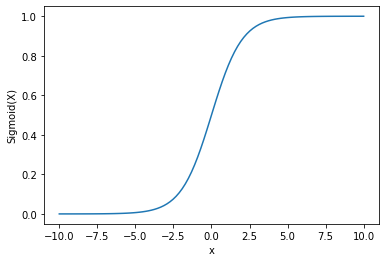

In [5]:
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

We interpret the output of our model as <br><br>
<center> $h_{\theta}(x) = P(y=1|x;\theta)$</center> <br>
Or in words: the probability that y=1, given x, parameterised by $\theta$. Similarly then, for a binary classification problem:<br><br>
<center> $P(y=0|x;\theta) = 1 - P(y=1|x;\theta)$</center> 

**Note**: Like in normal linear regression, we can generate non-linear models using logistic regresssion. To do so, we would need to use some higher order non-linear terms within our hypothesis <br><br>

<center>$h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} +.  \theta_{3}x_{1}^{2} +  \theta_{4}x_{2}^{2}$) </center>  <br>

# Cost Function

In linear regression we use **Mean Squared Error** cost function to penalise our model during training: <br><br>

<center>$J(\theta) = \frac{1}{2m}{\sum^{m}_{i=1}{Cost}(h_{\theta}(x^{(i)}),y^{(i)}))}$</center> <br>

where

<center>$\textrm{Cost}(h_{\theta}(x),y)= (h_{\theta}(x^{(i)})-y^{(i)})^{2},$</center> <br>

However, inputting our new hypothesis (Logistic Regression model) defined above<br><br><br>

<center> $h_{\theta}(x) = \frac{1}{1+\exp^{-{\theta}^T x}}$</center> <br>

creates a non-convex $J(\theta)$. The mathematical detail of this are beyond the scope of this session, but essentially this means we need a new cost function to train our model on!

Or new cost function will intead be: 

<center>$\textrm{Cost}(h_{\theta}(x),y)=   \begin{cases}
    -\log(h_{\theta}(x))       & \quad \text{if } y=1\\
    -\log(1-h_\theta(x))  & \quad \text{if } y=0 
  \end{cases}$<br><br>
    
Known as the **log-loss** or **cross-entropy** loss function. For more information see this [link](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy). 

An equivelent and more compact of writing this is: <br><br>
<center>$\textrm{Cost}(h_{\theta}(x),y)= -y\log(h_{\theta}(x))-(1-y)\log(1-h_{\theta}(x))$

giving:

<center>$J(\theta) = -\frac{1}{2m}{\sum^{m}_{i=1}}y\log(h_{\theta}(x))+(1-y)\log(1-h_{\theta}(x))$</center> <br>

and adding a regularization term we have: <br><br>

<center>$J(\theta) = [\frac{1}{m}{\sum^{m}_{i=1}}-y^{(i)}\log(h_{\theta}(x^{(i)})) - (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\sum^{n}_{j=1}\theta_{j}^{2}  $</center> 

<br>

where m is the number of training examples, and n is the number of parameters (where $\theta_{0}$ is the parameter for the bias term). To find the parameters $\theta$ that minimise our cost function we will use Gradient Descent.

# Gradient Descent
Recall that the general Gradient Descent algorithm is as follows:

Repeat $\{$

<center>$\theta_{j} := \theta_{j}-\alpha \frac{\delta}{\delta \theta_{j}}J(\theta)$</center>

$\}$




Where the partial derivative of the regularized cost function<br>

for j=0 (i.e., for the bias term): <br>

<center>$  \frac{\delta J(\theta)}{\delta \theta_{j}} = \frac{1}{m} {\sum^{m}_{i=1}} (h_{\theta}(x^{(i)} - y^{(i)})x_{j}^{(i)})        $<center>

<br>
    
and for j $\ge$ 1 (i.e. for the rest of the features): <br><br>
    
<center>$  \frac{\delta J(\theta)}{\delta \theta_{j}} = \frac{1}{m} {\sum^{m}_{i=1}} (h_{\theta}(x^{(i)} - y^{(i)})x_{j}^{(i)})) + \frac{\lambda}{m}\theta_{j}        $<center><br><br>
    
 
Note: When implementing Gradient Descent, using a vectorised method (lineaavoids the need to create for loops. Gradient Descent can be rewritten as follows:<br><br>

<center>$\theta := \theta -\frac{\alpha}{m} X^{T}(g(X\theta)-\bar{y}$</center>

# Predicting the class

After optimizing our parameters, $\theta$, by gradient descent, we now want to predict the class labels. This is done by selecting a threshold.

I.e.: <br>
if $hyp_{\theta}(x^{(i)}) \ge 0.5, y_{pred}=1$ <br>
if $hyp_{\theta}(x^{(i)}) < 0.5, y_{pred}=0$ <br>